In [1]:
from pprint import pprint
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.utils import shuffle
from utils import loadRawTrainData

dataFrame = loadRawTrainData()
dataFrame = shuffle(dataFrame, random_state=10)
dataFrame.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sam.bhandari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sam.bhandari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,sentiment,id,timestamp,query,user,tweet
685610,0,2250819430,Sat Jun 20 01:34:59 PDT 2009,NO_QUERY,The_Khristos,"@MrDAprano, honnestly I'm not going to miss th..."
446784,0,2068515884,Sun Jun 07 14:12:53 PDT 2009,NO_QUERY,teale,Tired after spending a restless night with Tie...
1231978,4,1991871464,Mon Jun 01 07:48:38 PDT 2009,NO_QUERY,jenjeahaly,@bradgallaway Yup popiscle Not sure if you've...
1496263,4,2070090087,Sun Jun 07 17:04:40 PDT 2009,NO_QUERY,fashinator1985,@candydiaz LOL save a lil arse for me candy!
944257,4,1795457800,Thu May 14 07:48:29 PDT 2009,NO_QUERY,krrley,@StephanieFizer No problem!! Your stuff is so ...


In [3]:
from utils import removeUnusedColumns

dataFrame = removeUnusedColumns(dataFrame)
dataFrame.head()

Removing columns - id, timestamp, query, and user


,sentiment,tweet
685610,0,"@MrDAprano, honnestly I'm not going to miss th..."
446784,0,Tired after spending a restless night with Tie...
1231978,4,@bradgallaway Yup popiscle Not sure if you've...
1496263,4,@candydiaz LOL save a lil arse for me candy!
944257,4,@StephanieFizer No problem!! Your stuff is so ...


In [4]:
dataFrame.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [5]:
from utils import loadDataForTesting

testDf = loadDataForTesting()
testDf.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sam.bhandari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sam.bhandari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Removing columns - id, timestamp, query, and user


,sentiment,tweet
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,Reading my kindle2... Love it... Lee childs i...
2,4,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,@kenburbary You'll love your Kindle2. I've had...
4,4,@mikefish Fair enough. But i have the Kindle2...


In [6]:
testDf.sentiment.value_counts()


4    182
0    177
2    139
Name: sentiment, dtype: int64

In [8]:
neutralRemovedDf = testDf.drop(testDf[testDf.sentiment == 2].index)
print(neutralRemovedDf.sentiment.value_counts())
neutralRemovedDf.head()

4    182
0    177
Name: sentiment, dtype: int64


,sentiment,tweet
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,Reading my kindle2... Love it... Lee childs i...
2,4,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,@kenburbary You'll love your Kindle2. I've had...
4,4,@mikefish Fair enough. But i have the Kindle2...


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(dataFrame['tweet'])
transformedTrain = vectorizer.transform(dataFrame['tweet'])
transformedTest = vectorizer.transform(neutralRemovedDf['tweet'])

(1600000, 684358)
31
1
(359, 684358)
26
2


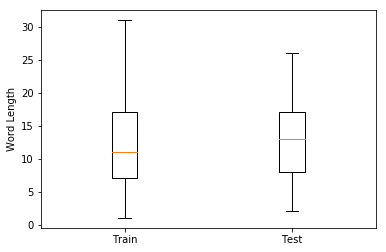

In [72]:
print (transformedTrain.shape)
wordCountTrainArr = np.diff(transformedTrain.indptr)
print (max(wordCountTrainArr))
print (min(wordCountTrainArr))

print (transformedTest.shape)
wordCountTestArr = np.diff(transformedTest.indptr)
print (max(wordCountTestArr))
print (min(wordCountTestArr))

plt.boxplot([wordCountTrainArr, wordCountTestArr], labels=['Train', 'Test'])
plt.ylabel('Word Length')
plt.savefig('wordcountsBoxplot.png')

In [11]:
from baseline import predict

baselineTrainPrediction = predict(dataFrame)
baselineTrainPrediction.head()

685610     4
446784     0
1231978    4
1496263    4
944257     4
dtype: int64

In [12]:
from baseline import getConfusionMatrix
baselineConfusionMatrix = getConfusionMatrix(dataFrame, baselineTrainPrediction)
pprint(baselineConfusionMatrix)

array([[132985, 667015],
       [ 49349, 750651]])


In [13]:
from baseline import getAccuracy
baselineTrainAccuracy = getAccuracy(dataFrame, baselineTrainPrediction)
print('Accuracy of Baseline model for training data is: %f' %(baselineTrainAccuracy))

Accuracy of Baseline model for training data is: 0.552273


In [14]:
baselineTestPrediction = predict(neutralRemovedDf)
baselineTestAccuracy = getAccuracy(neutralRemovedDf, baselineTestPrediction)
print('Accuracy of Baseline model for test data is: %f' %(baselineTestAccuracy))

Accuracy of Baseline model for test data is: 0.604457


In [16]:
from gridSearch import createLSTMModel, createCNNModel
lstmModel = createLSTMModel(50000, 34)
print(lstmModel.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 34, 16)            800000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 34, 100)           46800     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 927,301
Trainable params: 927,301
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
cnnModel = createCNNModel(50000, 34)
print(cnnModel.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 34, 16)            800000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 34, 64)            3136      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 34, 32)            6176      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 34, 16)            1552      
_________________________________________________________________
flatten_1 (Flatten)          (None, 544)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 544)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               69760     
__________

In [18]:
from testModels import testAll
from utils import preProcessWithTokens
from gridSearch import getIntegerEncoder, getPaddedInputIntegerSequences, getEncodedClasses, IntegerEncoder

allPredictions = testAll(neutralRemovedDf)

/Users/sam.bhandari/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sam.bhandari/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


naiveBayesTF test accuracy score:  0.821727 
naiveBayesTFIDF test accuracy score:  0.821727 
logitTF test accuracy score:  0.818942 
logitTFIDF test accuracy score:  0.830084 
svmTF test accuracy score:  0.816156 
svmTFIDF test accuracy score:  0.827298 


/Users/sam.bhandari/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


lstm test accuracy score:  0.816156 
cnn test accuracy score:  0.818942 


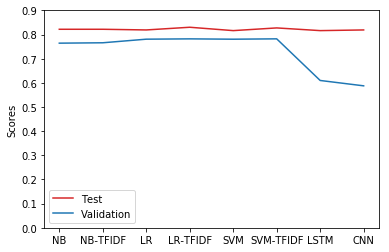

In [85]:
testScores = [0.821727, 0.821727, 0.818942, 0.830084, 0.816156, 0.827298, 0.816156, 0.818942]
validationScores = [0.764217, 0.765830, 0.780695, 0.782027, 0.780621, 0.782117, 0.609803, 0.587616]

ind = np.arange(8)    # the x locations for the groups
yticks = np.arange(0, 1, 0.1)

p1 = plt.plot(ind, testScores, color='#d62728')
p2 = plt.plot(ind, validationScores)

plt.ylabel('Scores')
plt.xticks(ind, ('NB', 'NB-TFIDF', 'LR', 'LR-TFIDF', 'SVM', 'SVM-TFIDF', 'LSTM', 'CNN'))
plt.yticks(yticks)
plt.legend((p1[0], p2[0]), ('Test', 'Validation'))
plt.savefig('images/validationAndTestScores.png')

In [90]:
import sklearn
import matplotlib
import nltk
import keras

print('sklearn version: %s' %(sklearn.__version__))
print('matplotlib version: %s' %(matplotlib.__version__))
print('numpy version: %s' %(np.__version__))
print('pandas version: %s' %(pd.__version__))
print('nltk version: %s' %(nltk.__version__))
print('keras version: %s' %(keras.__version__))

sklearn version: 0.20.1
matplotlib version: 3.0.2
numpy version: 1.15.4
pandas version: 0.23.4
nltk version: 3.3
keras version: 2.2.4
